本章目标：
- 使用第一章的构建块构建`线性回归模型`
- 证明在第一章所做的导数的推理可以训练`线性回归模型`
- 将上述模型扩展（依旧使用我们的构建块）到一层神经网络

在接下来的第三章时，我们依旧使用相同的构建块去构建深度学习模型。

在深入主题之前，先概述一下机器学习的子集： `监督学习`，接下来将重点关注如何使用神经网络去解决这类问题。

## 监督学习概述

从高层次来说，机器学习指的是通过构建一种算法，用来揭示（或学习）数据之间的关系。这种关系可以是分类，回归，聚类等。监督学习可以被描述为机器学习的一个子集，专门用于查找已测量的数据特征之间的关系。

在本章节会使用监督学习去解决现实世界中的房价预测问题：寻找房屋特征与房屋价值之间的关系。我们用数值去表现房屋的各个特征，也就是 `ndarray`。

在这个 `ndarray` 中，每一行的长度就是数据的特征数。通常情况下，一个属性（characteristic）会有多个特征（features），但在本章中，我们将一个属性映射为一个特征。在实践中，我们通过选择一个我们想要从其他特征中预测的特征，我们将此特征称为我们的目标（target）。选择哪个特征作为目标是完全任意的，取决于要解决的问题。

下图显示了监督学习描述的层次结构，从在数据中查找关系的最高级别描述，到通过训练模型来量化这些关系的最低级别，以揭示特征和目标之间的数值表示。

![Overview](./images/02_supervised_learning_overview.png)

本章的内容主要集中在图片的下半部分，也就是模型。

## 监督学习模型

我们的目标是找到一个以 `ndarray` 作为输入，以 `ndarray` 作为输出的函数，这个输出的 `ndarray` 尽可能的接近目标。

用 `n` 行的矩阵 `X` 表示输入，每一行都表示样本的 `k` 个特征。每一行（一个样本）使用向量表示：$x_i = \begin{bmatrix} x_{i1} & x_{i2} & \cdots & x_{ik} \end{bmatrix}$ 。把所有的样本数据放在一起，我们得到一个 `n x k` 的矩阵 `X`，以下表示的是一个 `n = 3` 的矩阵：

$$
X_batch =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1k} \\
x_{21} & x_{22} & \cdots & x_{2k} \\
x_{31} & x_{32} & \cdots & x_{3k} \\
\end{bmatrix}
$$

对于输入的矩阵 `X`，我们有一个 `n` 行的向量 `y`，表示我们的目标：
$$
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\end{bmatrix}
$$


我们的目标是找到一个函数 $f$，使得 $f(X) \approx y$。首先我们从最简单的模型：线性回归开始。

## 线性回归


线性回归通常表示为：

$$
y_i = \beta_0 + \beta_1 \times x_{1} + \beta_2 \times x_{2} + \cdots + \beta_k \times x_{k} + \epsilon
$$


上述公式不够直观，接下来用图示进行解释。


## Diagram

![Linear Regression](./images/02_linear_regression.png)


也就是有一组观察数据 $x_i = \begin{bmatrix} x_1 & x_2 & x_3 & \cdots & x_k \end{bmatrix} $ 和另外一组称之为 $W$ 的参数：

$$
W = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_k \end{bmatrix}
$$

那么预测值就为：

$$
p_i = x_i \times W = w_1 \times x_{i1} + w_2 \times x_{i2} + \cdots + w_k \times x_{ik}
$$

如果我们有多组观察数据，也就是上述的 $X_{batch}$ 那么预测值就是矩阵相乘：

$$
p_{batch} = X_{batch} \times W = 
\begin{bmatrix} 
x_{11} & x_{12} & \cdots & x_{1k} \\ 
x_{21} & x_{22} & \cdots & x_{2k} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
x_{n1} & x_{n2} & \cdots & x_{nk} 
\end{bmatrix} \times 
\begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_k 
\end{bmatrix} = 
\begin{bmatrix}
x_{11} \times w_1 + x_{12} \times w_2 + \cdots + x_{1k} \times w_k \\
x_{21} \times w_1 + x_{22} \times w_2 + \cdots + x_{2k} \times w_k \\
\vdots \\
x_{n1} \times w_1 + x_{n2} \times w_2 + \cdots + x_{nk} \times w_k \\
\end{bmatrix}
$$

### "训练"模型

什么是"训练"模型？直白地说，模型将数据作为输入，以某种方式将它们与参数相结合，并产生预测值。例如上述的线性回归模型，我们将数据 `X` 与参数 `W` 相乘，得到预测值 `p`：
$$
p_{batch} = 
\begin{bmatrix}
p_1 \\
p_2 \\
p_3
\end{bmatrix}
$$

为了"训练"模型，我们还需要额外的信息，也就是如何衡量预测值的好坏。我们将这个信息称为 `loss function`，用来衡量预测值(`p`)与目标值（`y`）之间的差异。在线性回归中，我们使用 `mean squared error` 作为 `loss function`：

$$
MSE(p_{batch},y_{batch}) = MSE \left(
\begin{bmatrix}
p_1 \\
p_2 \\
p_3
\end{bmatrix},
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
\right) = 
\frac{(y_1 - p_1)^2 + (y_2 - p_2)^2 + (y_3 - p_3)^2}{3} 
$$

得到的值我们称之为 $L$。一旦我们有了这个值，我们就可以使用我们在第 1 章中看到的所有技术来计算这个数字相对于 $W$ 的每个元素的 `梯度`。然后，我们可以使用这些导数在导致 $L$ 减小的方向上更新 $W$ 的每个元素。重复上述步骤直到我们能接受的 $L$ 为止。这个过程我们称之为 `训练` 模型。


### Diagram


没有偏置的情况：

![Linear Regression](./images/02_linear_regression_forward.png)



$L$ 值可以通过以下公式计算：

$$
L = \Lambda(\nu(X, W), Y)
$$


有偏置的情况：

![Linear Regression](./images/02_linear_regression_forward_bias.png)


计算公式：

$$
p_{batch} = x_i dot W + b = 
\begin{bmatrix}
x_{11} \times w_1 + x_{12} \times w_2 + \cdots + x_{1k} \times w_k + b \\
x_{21} \times w_1 + x_{22} \times w_2 + \cdots + x_{2k} \times w_k + b \\
x_{31} \times w_1 + x_{32} \times w_2 + \cdots + x_{3k} \times w_k + b \\
\end{bmatrix} = 
\begin{bmatrix}
p_1 \\
p_2 \\
p_3
\end{bmatrix}
$$

### Code

In [1]:
import numpy as np
from numpy import ndarray

from typing import Callable, Dict, Tuple, List

np.set_printoptions(precision=4)

In [2]:
%load_ext autoreload
%autoreload 2
TEST_ALL = False

In [3]:
import pandas as pd

# New source for Boston housing data per https://scikit-learn.org/1.0/whats_new/v1.0.html#changes-1-0
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv("./housing.csv", sep="\\s+", skiprows=22, header=None)

In [4]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
features = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                     'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

SciKit Learn Linear Regression

In [5]:
# Data prepare

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
data = s.fit_transform(data)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [6]:
# Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

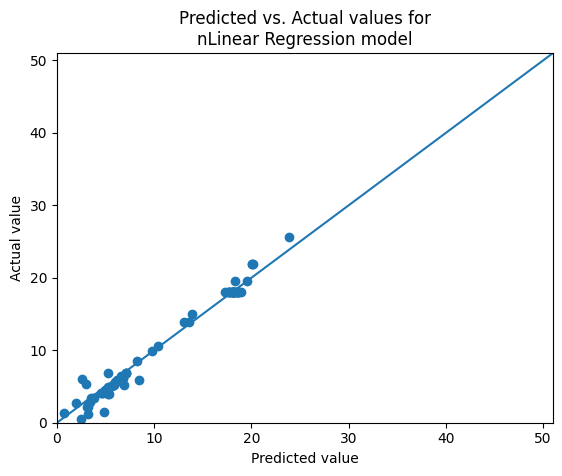

In [7]:
import matplotlib.pyplot as plt

plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51]);
# plt.savefig(IMG_FILEPATH + "00_linear_real_pred_vs_actual.png");

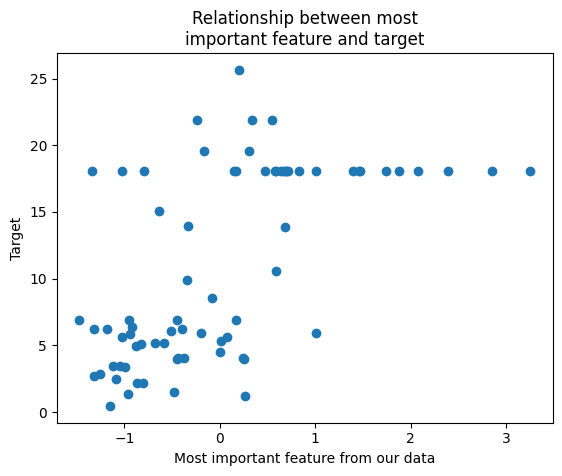

In [8]:
# Testing changing feature

plt.scatter(X_test[:, 12], y_test)
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target");
# plt.savefig(IMG_FILEPATH + "02_most_important_feature_vs_target.png")

In [9]:
# Model error

def mae(preds: ndarray, actuals: ndarray):
    """
    Compute mean absolute error.
    """
    return np.mean(np.abs(preds - actuals))


def rmse(preds: ndarray, actuals: ndarray):
    """
    Compute root mean squared error.
    """
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [10]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
                                                            "Root mean squared error:", round(rmse(preds, y_test), 4))

import numpy as np

np.round(lr.coef_, 2)

Mean absolute error: 0.7238 
Root mean squared error: 1.0453


array([[ 0.01,  0.57,  6.11,  0.01,  0.51,  0.03, -0.06,  0.16,  0.61,
        -0.43, -0.03, -0.12,  0.18,  0.09,  0.02, -0.65]])

## Manual Linear Regression

In [11]:
def forward_linear_regression(X_batch: ndarray,
                              y_batch: ndarray,
                              weights: Dict[str, ndarray]
                              ) -> Tuple[float, Dict[str, ndarray]]:
    """
    Forward pass for the step-by-step linear regression.
    """
    # assert batch sizes of X and y are equal
    assert X_batch.shape[0] == y_batch.shape[0]

    # assert that matrix multiplication can work
    assert X_batch.shape[1] == weights['W'].shape[0]

    # assert that B is simply a 1x1 ndarray
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    # compute the operations on the forward pass
    N = np.dot(X_batch, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the forward pass
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X_batch
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y_batch

    return loss, forward_info

In [12]:
def to_2d_np(a: ndarray,
             type: str = "col") -> ndarray:
    """
    Turns a 1D Tensor into 2D
    """

    assert a.ndim == 1, \
        "Input tensors must be 1 dimensional"

    if type == "col":
        return a.reshape(-1, 1)
    elif type == "row":
        return a.reshape(1, -1)


def permute_data(X: ndarray, y: ndarray):
    """
    Permute X and y, using the same permutation, along axis=0
    """
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm]

In [13]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    """
    Compute dLdW and dLdB for the step-by-step linear regression model.
    """
    batch_size = forward_info['X'].shape[0]

    # L(P,Y) = (Y -P)^2 的偏导数
    dLdP = -2 * (forward_info['y'] - forward_info['P'])

    # N 是求和，所以偏导数是 1
    dPdN = np.ones_like(forward_info['N'])

    # 偏置 B 也是加，所以偏导数是 1
    dPdB = np.ones_like(weights['B'])

    # L 对 N 的偏导数就是上述相乘
    dLdN = dLdP * dPdN

    # (X, W) 对 W 的偏导数是 X 的转置
    dNdW = np.transpose(forward_info['X'], (1, 0))

    # need to use matrix multiplication here,
    # with dNdW on the left (see note at the end of last chapter)    
    dLdW = np.dot(dNdW, dLdN)

    # need to sum along dimension representing the batch size:
    # see note near the end of the chapter    
    dLdB = (dLdP * dPdB).sum(axis=0)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB

    return loss_gradients

In [14]:
Batch = Tuple[ndarray, ndarray]


def generate_batch(X: ndarray,
                   y: ndarray,
                   start: int = 0,
                   batch_size: int = 10) -> Batch:
    """
    Generate batch from X and y, given a start position
    """
    assert X.ndim == y.ndim == 2, \
        "X and Y must be 2 dimensional"

    if start + batch_size > X.shape[0]:
        batch_size = X.shape[0] - start

    X_batch, y_batch = X[start:start + batch_size], y[start:start + batch_size]

    return X_batch, y_batch


def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    """
    Generate predictions and calculate loss for a step-by-step linear regression
    (used mostly during inference).
    """
    N = np.dot(X, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss


def init_weights(n_in: int) -> Dict[str, ndarray]:
    """
    Initialize weights on first forward pass of model.
    """

    weights: Dict[str, ndarray] = {}
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)

    weights['W'] = W
    weights['B'] = B

    return weights

In [15]:
def train(X: ndarray,
          y: ndarray,
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False,
          return_weights: bool = False,
          seed: int = 1) -> None:
    """
    Train model for a certain number of epochs.
    """
    if seed:
        np.random.seed(seed)
    start = 0

    # Initialize weights
    weights = init_weights(X.shape[1])

    # Permute data
    X, y = permute_data(X, y)

    if return_losses:
        losses = []

    for i in range(n_iter):

        # Generate batch
        if start >= X.shape[0]:
            X, y = permute_data(X, y)
            start = 0

        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size

        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights

    return None

### 模型训练

In [16]:
train_info = train(X_train, y_train,
                   n_iter=1000,
                   learning_rate=0.001,
                   batch_size=23,
                   return_losses=True,
                   return_weights=True,
                   seed=180708)
losses = train_info[0]
weights = train_info[1]

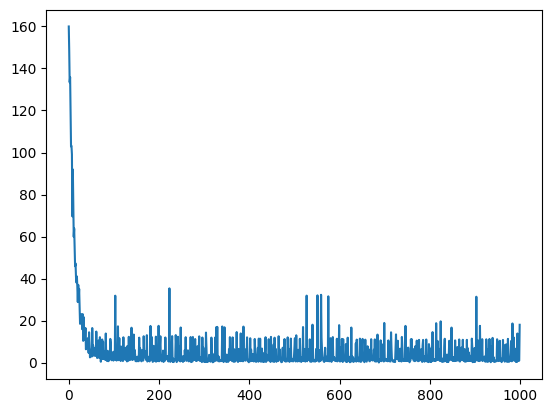

In [17]:
plt.plot(list(range(1000)), losses);

In [18]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]):
    """
    Generate predictions from the step-by-step linear regression model.
    """

    N = np.dot(X, weights['W'])

    return N + weights['B']


preds = predict(X_test, weights)

print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
                                                            "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.72 
Root mean squared error: 1.0444


In [19]:
np.round(y_test.mean(), 4)

10.9875

In [20]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

0.095

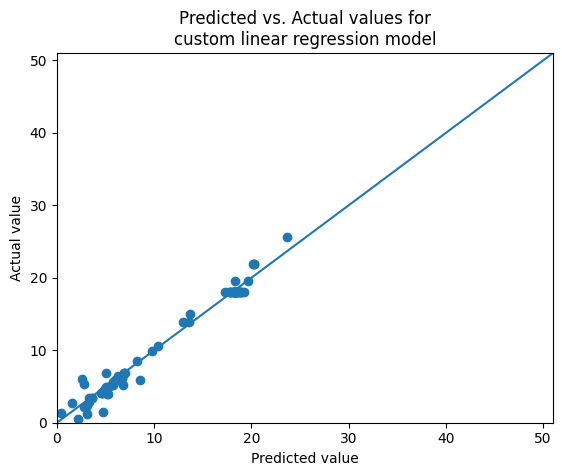

In [21]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51]);
# plt.savefig(GRAPHS_IMG_FILEPATH + "01_linear_custom_pred_vs_actual.png");

### 模型评估

In [22]:
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a, b], axis=1)
test_preds = predict(test_feature, weights)[:, 0]

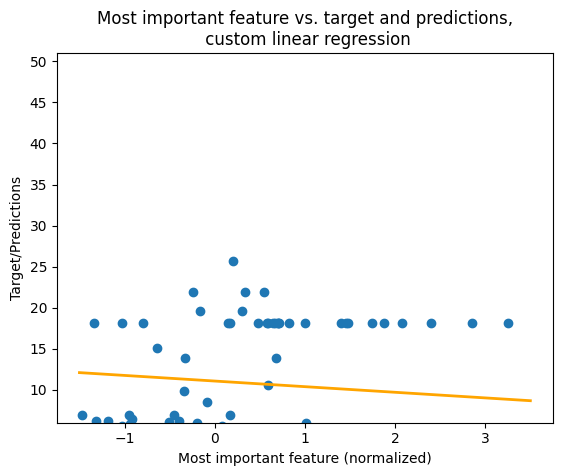

In [23]:
plt.scatter(X_test[:, 12], y_test)
plt.plot(np.array(test_feature[:, -1]), test_preds, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression");
# plt.savefig(GRAPHS_IMG_FILEPATH + "03_most_important_feature_vs_predictions.png")

上图也显示了线性回归的限制：它只能捕捉到线性关系。在这种情况下，我们可以看到，当最重要的特征增加时，目标值也会增加。但是，我们的模型无法捕捉到这种关系的变化。这就是为什么我们需要更复杂的模型，比如神经网络。

### 一些系数

系数越大意味着特征对目标的影响越大，也就越重要。

In [24]:

np.round(weights['W'].reshape(-1), 4)

array([ 1.5800e-02,  5.4890e-01,  6.0833e+00,  2.1100e-02,  5.5050e-01,
        1.6100e-02, -4.4800e-02,  1.5910e-01,  5.2620e-01, -2.9800e-01,
       -5.5000e-03, -1.3160e-01,  2.0870e-01,  1.0570e-01,  3.4000e-02,
       -6.8410e-01])

In [25]:
np.round(lr.coef_, 4)

array([[ 5.4000e-03,  5.7030e-01,  6.1083e+00,  1.0900e-02,  5.1060e-01,
         2.8700e-02, -6.3900e-02,  1.6180e-01,  6.1380e-01, -4.2820e-01,
        -3.3100e-02, -1.2100e-01,  1.7780e-01,  8.8500e-02,  1.5900e-02,
        -6.4750e-01]])

In [26]:
np.round(weights['B'], 4)

array([[11.3218]])

In [27]:
np.round(lr.intercept_, 4)

array([11.3405])

### 特征与目标之间的理论关系

(6.0, 51.0)

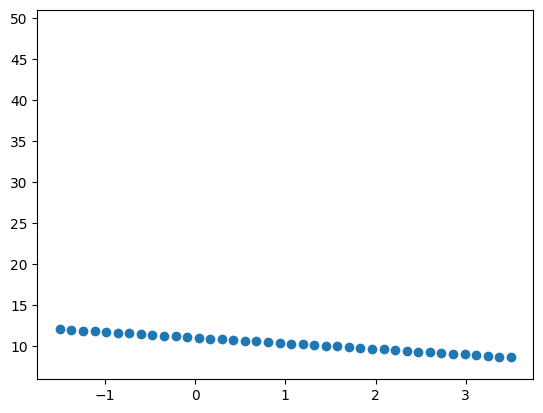

In [28]:
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a, b], axis=1)
preds = predict(test_feature, weights)[:, 0]

plt.scatter(np.array(test_feature[:, -1]), np.array(preds))
plt.ylim([6, 51])
# plt.savefig(GRAPHS_IMG_FILEPATH + "/04_relationship_most_impt_feat_preds.png")

## 从零开始的神经网络

核心思想是：首先进行一系列线性回归操作，然后将其结果传递给非线性函数，最后再次进行线性回归操作，最终做出预测。这就是神经网络的基本结构。

### 第一步：一系列线性回归

一个线性回归涉及到对一组参数进行矩阵相乘操作，也就是：如果数据 $X$ 有维度：[batch_size, num_features]，将其与拥有维度：[num_features, 1] 的权重矩阵 $W$相乘，获得一个维度为：[batch_size, 1] 的输出。这个输出只是批量中的一个样本的预测值。
对于多个线性回归操作，那么权重矩阵的维度为：[num_features, num_outputs]，输出的维度为：[batch_size, num_outputs]。

我们会问，这些权重和都是什么？应该将它们总的每一个都视为“学习到的特征”，也就是原始特征的组合。一旦网络经过训练，其代表的就是特征数据的组合，这些组合数据将用于预测目标。

### 第二步：非线性函数

将上述第一步得到的权重和的每一项，都传递给一个非线性函数，这里选择 `sigmoid`：
$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$


选择非线性函数的要求：
- 单调
- 非线性

`sigmoid` 函数是一个常用的非线性函数，它的输出值在 0 到 1 之间，这样可以很好地表示概率，同时它的导数也很容易计算：
$$
\frac{\partial \sigma}{\partial u}(x) = \sigma(x) \times (1 - \sigma(x))
$$

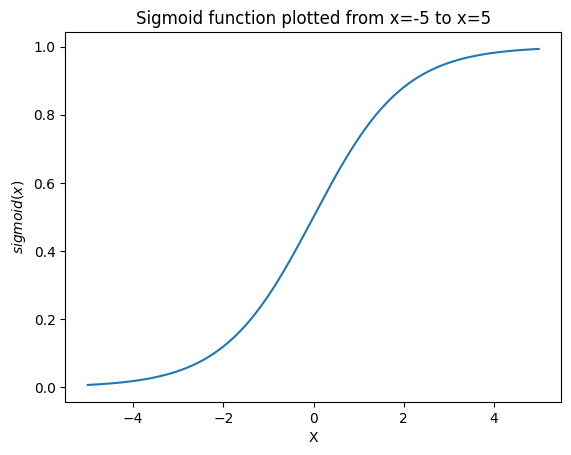

In [29]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-1.0 * x))


plt.plot(np.arange(-5, 5, 0.01),
         sigmoid(np.arange(-5, 5, 0.01)));
plt.title("Sigmoid function plotted from x=-5 to x=5")
plt.xlabel("X")
plt.ylabel("$sigmoid(x)$");
# plt.savefig(GRAPHS_IMG_FILEPATH + "05_sigmoid_function.png")

### 其他的线性回归

我们将数据传递给模型，利用链式法则计算梯度，使用梯度下降法更新权重来减少损失，在每次迭代时朝着减少损失的方向更新权重。随着时间的推移（我们希望），我们最终会得到一个比以前更准确的模型，一个已经 "学会 "特征与目标之间固有的非线性关系的模型。

### Diagram

![Neural Network](./images/02_computational_graph.png)

In [30]:
def init_weights(input_size: int,
                 hidden_size: int) -> Dict[str, ndarray]:
    """
    Initialize weights during the forward pass for step-by-step neural network model.
    """
    weights: Dict[str, ndarray] = {}
    weights['W1'] = np.random.randn(input_size, hidden_size)
    weights['B1'] = np.random.randn(1, hidden_size)
    weights['W2'] = np.random.randn(hidden_size, 1)
    weights['B2'] = np.random.randn(1, 1)
    return weights

In [31]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]
                 ) -> Tuple[Dict[str, ndarray], float]:
    """
    Compute the forward pass and the loss for the step-by-step 
    neural network model.     
    """
    M1 = np.dot(X, weights['W1'])

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights['W2'])

    P = M2 + weights['B2']

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['M1'] = M1
    forward_info['N1'] = N1
    forward_info['O1'] = O1
    forward_info['M2'] = M2
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

### Backward Pass
![Backward Pass](./images/02_partial_backward_pass.png)

![Backward Pass Explain](./images/02_partial_backward_pass_explain.png)

In [32]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    """
    Compute the partial derivatives of the loss with respect to each of the parameters in the neural network.
    """
    dLdP = -(forward_info['y'] - forward_info['P'])

    dPdM2 = np.ones_like(forward_info['M2'])

    dLdM2 = dLdP * dPdM2

    dPdB2 = np.ones_like(weights['B2'])

    dLdB2 = (dLdP * dPdB2).sum(axis=0)

    dM2dW2 = np.transpose(forward_info['O1'], (1, 0))

    dLdW2 = np.dot(dM2dW2, dLdP)

    dM2dO1 = np.transpose(weights['W2'], (1, 0))

    dLdO1 = np.dot(dLdM2, dM2dO1)

    dO1dN1 = sigmoid(forward_info['N1']) * (1 - sigmoid(forward_info['N1']))

    dLdN1 = dLdO1 * dO1dN1

    dN1dB1 = np.ones_like(weights['B1'])

    dN1dM1 = np.ones_like(forward_info['M1'])

    dLdB1 = (dLdN1 * dN1dB1).sum(axis=0)

    dLdM1 = dLdN1 * dN1dM1

    dM1dW1 = np.transpose(forward_info['X'], (1, 0))

    dLdW1 = np.dot(dM1dW1, dLdM1)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W2'] = dLdW2
    loss_gradients['B2'] = dLdB2.sum(axis=0)
    loss_gradients['W1'] = dLdW1
    loss_gradients['B1'] = dLdB1.sum(axis=0)

    return loss_gradients

In [33]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]) -> ndarray:
    """
    Generate predictions from the step-by-step neural network model. 
    """
    M1 = np.dot(X, weights['W1'])

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights['W2'])

    P = M2 + weights['B2']

    return P

In [34]:
from sklearn.metrics import r2_score


def r2_score_lr(learning_rate):
    train_info = train(X_train, y_train, X_test, y_test,
                       n_iter=100000,
                       test_every=100000,
                       learning_rate=learning_rate,
                       batch_size=23,
                       return_losses=False,
                       return_weights=True,
                       return_scores=False,
                       seed=80718)
    weights = train_info[1]
    preds = predict(X_test, weights)
    return r2_score(y_test, preds)

In [35]:
def train(X_train: ndarray, y_train: ndarray,
          X_test: ndarray, y_test: ndarray,
          n_iter: int = 1000,
          test_every: int = 1000,
          learning_rate: float = 0.01,
          hidden_size=13,
          batch_size: int = 100,
          return_losses: bool = False,
          return_weights: bool = False,
          return_scores: bool = False,
          seed: int = 1):
    if seed:
        np.random.seed(seed)

    start = 0

    # Initialize weights
    weights = init_weights(X_train.shape[1],
                           hidden_size=hidden_size)

    # Permute data
    X_train, y_train = permute_data(X_train, y_train)

    losses = []

    val_scores = []

    for i in range(n_iter):

        # Generate batch
        if start >= X_train.shape[0]:
            X_train, y_train = permute_data(X_train, y_train)
            start = 0

        X_batch, y_batch = generate_batch(X_train, y_train, start, batch_size)
        start += batch_size

        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

        if return_scores:
            if i % test_every == 0 and i != 0:
                val_scores.append(r2_score(preds, y_test))

    if return_weights:
        return losses, weights, val_scores

    return None, None, None

In [36]:
if TEST_ALL:
    num_iter = 10000
    test_every = 1000
    train_info = train(X_train, y_train, X_test, y_test,
                       n_iter=num_iter,
                       test_every=test_every,
                       learning_rate=0.001,
                       batch_size=23,
                       return_losses=False,
                       return_weights=True,
                       return_scores=False,
                       seed=80718)
    losses = train_info[0]
    weights = train_info[1]
    val_scores = train_info[2]

In [37]:
if TEST_ALL:
    lrs = np.geomspace(1e-2, 1e-6, num=20)

In [38]:
if TEST_ALL:
    r2s = [r2_score_lr(lr) for lr in lrs]

In [39]:
if TEST_ALL:
    plt.semilogx(lrs, r2s)

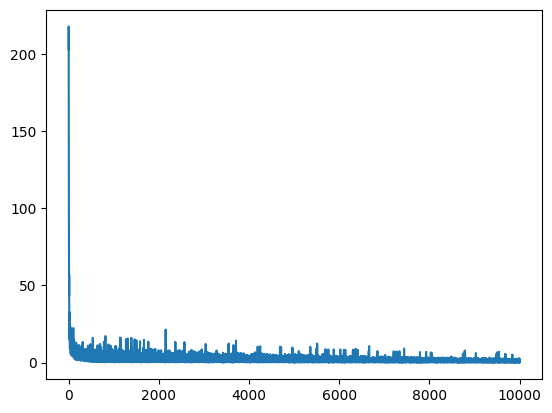

In [40]:
train_info = train(X_train, y_train, X_test, y_test,
                   n_iter=10000,
                   test_every=1000,
                   learning_rate=0.001,
                   batch_size=23,
                   return_losses=True,
                   return_weights=True,
                   return_scores=False,
                   seed=180807)
losses = train_info[0]
weights = train_info[1]

plt.plot(list(range(10000)), losses);

In [41]:
preds = predict(X_test, weights)

In [42]:
weights['W2']

array([[ 3.4872],
       [-3.6508],
       [ 3.4954],
       [ 3.5451],
       [ 3.8473],
       [ 4.0569],
       [ 2.2605],
       [ 3.3285],
       [-5.2851],
       [ 2.9471],
       [ 3.2065],
       [ 2.5251],
       [-3.3268]])

In [45]:
weights['W1'][5]

array([-2.3712,  0.5989, -0.0559,  0.4925, -1.2099,  0.1334,  0.1675,
        0.3675, -0.3233,  0.0582, -0.0683,  1.7915, -0.1326])

In [46]:
weights['W1'][8]

array([ 1.9285,  0.2193,  0.7754,  1.4172, -1.2846,  2.1788,  1.8555,
       -0.5434,  0.4343, -1.2957,  0.138 , -1.266 ,  1.2894])

In [47]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
                                                            "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.9413 
Root mean squared error: 1.3965


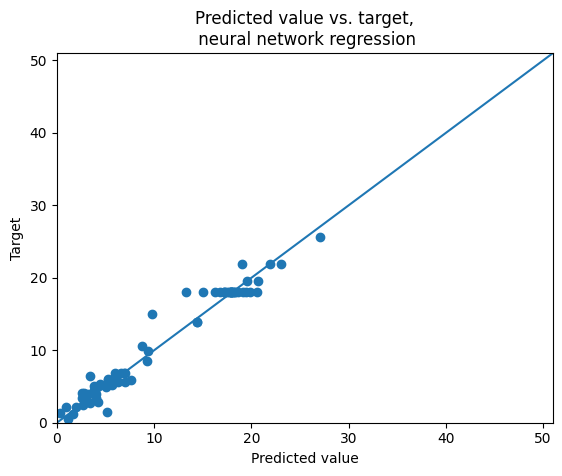

In [48]:
plt.xlabel("Predicted value")
plt.ylabel("Target")
plt.title("Predicted value vs. target,\n neural network regression")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51]);
# plt.savefig(GRAPHS_IMG_FILEPATH + "07_neural_network_regression_preds_vs_target.png");

In [49]:
np.round(np.mean(np.array(np.abs(preds - y_test))), 4)

0.9413

In [50]:
np.round(np.mean(np.array(np.power(preds - y_test, 2))), 4)

1.9501

In [51]:
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
preds_test = predict(test_feature, weights)[:, 0]

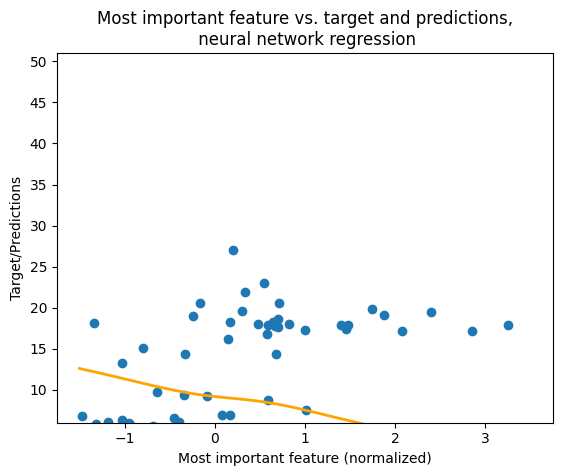

In [52]:
plt.scatter(X_test[:, 12], preds)
plt.plot(np.array(test_feature[:, -1]), preds_test, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n neural network regression");
# plt.savefig(GRAPHS_IMG_FILEPATH + "08_neural_network_regression_impt_feat_vs_preds.png")